In [1]:
import pandas as pd 
import numpy as np 
import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

pd.__version__, np.__version__, sklearn.__version__

('1.3.5', '1.21.6', '1.0.2')

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/marrekb/dl-ml-stat/main/02_tennis_winner_prediction/dataset.csv')

y = dataset['result'].to_numpy() 
X = dataset.drop('result', axis = 1)

columns_to_scale = ['age_diff', 'rank_diff', 'win_diff', 'loss_diff', 'swin_diff', 'sloss_diff']
scaler = StandardScaler()
scaler.fit(X[columns_to_scale])

scaled_X = scaler.transform(X[columns_to_scale])
df_scaled_X = pd.DataFrame(scaled_X, columns = columns_to_scale)
df_scaled_X.describe()

con_X = np.concatenate((scaled_X, X[['p1_hand_L', 'p1_hand_R', 'p1_hand_U', 'p2_hand_L', 'p2_hand_R', 'p2_hand_U']].to_numpy()), axis = 1)

x_train, x_test, y_train, y_test = train_test_split(con_X, y, test_size = 0.2, random_state = 42)

In [3]:
models, estimators, scores = [], [], []

for n in range(20, 101, 20):
  m = RandomForestClassifier(n_estimators=n)
  m.fit(x_train, y_train)

  estimators.append(n)
  models.append(m)
  s = m.score(x_test, y_test)
  scores.append(s)
  print('N: ', n, ', score: ', s)



N:  20 , score:  0.6659475836994395
N:  40 , score:  0.6720496894409937
N:  60 , score:  0.6750795334040297
N:  80 , score:  0.675782457203454
N:  100 , score:  0.6768913800939251


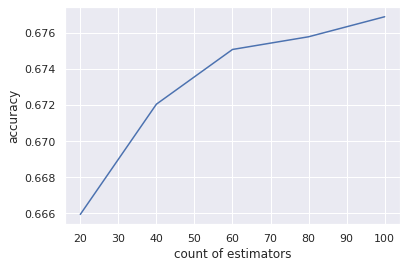

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(estimators, scores)
plt.xlabel('count of estimators')
plt.ylabel('accuracy')
plt.show()

In [5]:
def measure_with_bound(prediction, target, bound):
  upper_bound = 0.5 + bound 
  zeros_idx = prediction[:, 0] >= upper_bound
  ones_idx = prediction[:, 1] >= upper_bound 

  true_zeros =  target[zeros_idx] == 0
  true_ones = target[ones_idx] == 1

  count = zeros_idx.sum() + ones_idx.sum()
  return (true_zeros.sum() + true_ones.sum()) / count, count



In [7]:
predictions = models[-1].predict_proba(x_test)

for i in range(5, 50, 5):
  b = i / 100.0
  acc, count = measure_with_bound(predictions, y_test, b)
  print('bound: {b:.2f}, accuracy: {acc: .4f}, count: {count}'.format(b = b, acc = acc, count = count))

bound: 0.05, accuracy:  0.6982, count: 145233
bound: 0.10, accuracy:  0.7220, count: 123269
bound: 0.15, accuracy:  0.7463, count: 101574
bound: 0.20, accuracy:  0.7700, count: 80754
bound: 0.25, accuracy:  0.7957, count: 60701
bound: 0.30, accuracy:  0.8180, count: 42425
bound: 0.35, accuracy:  0.8387, count: 25768
bound: 0.40, accuracy:  0.8593, count: 12203
bound: 0.45, accuracy:  0.8697, count: 3231
